# Merging all SPEI-indices at 0.1 degrees (2000-2023) for every gridcell

This python script uses the xclim package to calculate the SPEI-1 to 24 for every gridcell at 0.1 degrees. When calcualted, I slice 2000-2023 from the data to save some space and make it quicker to save.

In [1]:
import xclim
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pint
from xclim import indices
from xclim.core import units
from xclim.indices import standardized_precipitation_evapotranspiration_index
import pandas as pd
import spei as si  # si for standardized index

xr.set_options(keep_attrs=True)

## Merge all the data together

First check for a random SPEI if the dimensions are correct.

In [18]:
parts = xr.open_mfdataset("/scratch/ruiij001/Data/SPEI/0_1_degrees_apr_2024/SPEI21_monthly_2000_2023_0_1_degree.nc_part_*.nc").__xarray_dataarray_variable__
parts 

<xarray.DataArray '__xarray_dataarray_variable__' (time: 288, lat: 1800,
                                                   lon: 3600)>
dask.array<concatenate, shape=(288, 1800, 3600), dtype=float64, chunksize=(288, 1800, 180), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat      (lat) float64 -90.0 -89.9 -89.8 -89.7 -89.6 ... 89.6 89.7 89.8 89.9
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-12-01
Attributes:
    calibration_period:  ['1950-01-01', '2020-12-01']
    window:              1
    scipy_dist:          fisk
    method:              APP
    group:               time.month

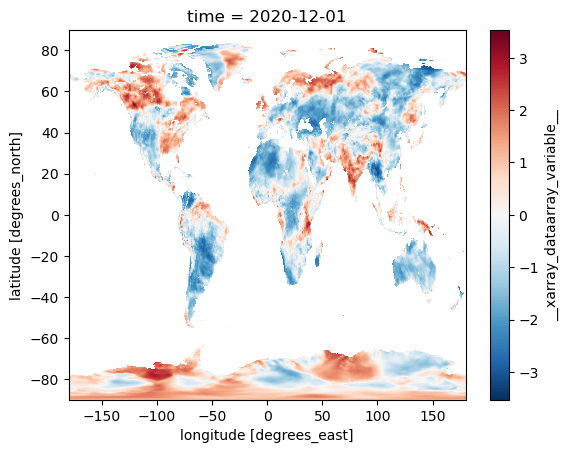

In [19]:
parts.sel(time = '2020-12-01').plot()

Now we can merge all the parts of the random SPEI index. In this case it is SPEI-21.

In [20]:
# Load the data
parts = xr.open_mfdataset("/scratch/ruiij001/Data/SPEI/0_1_degrees_apr_2024/SPEI21_monthly_2000_2023_0_1_degree.nc_part_*.nc")

# Specify compression settings with compression level
encoding = {var: {"zlib": True, "complevel": 9} for var in parts.variables}

# Save to a single NetCDF file with compression
parts.to_netcdf("/scratch/ruiij001/Data/SPEI/0_1_degrees_apr_2024/Compessed/SPEI21_monthly_2000_2023_0_1_degree.nc", encoding=encoding)


Check if everything went well

In [21]:
SPEI_21 = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_1_degrees_apr_2024/Compessed/SPEI21_monthly_2000_2023_0_1_degree.nc")
SPEI_21

<xarray.Dataset>
Dimensions:                        (lon: 3600, lat: 1800, time: 288)
Coordinates:
  * lon                            (lon) float64 -180.0 -179.9 ... 179.8 179.9
  * lat                            (lat) float64 -90.0 -89.9 -89.8 ... 89.8 89.9
  * time                           (time) datetime64[ns] 2000-01-01 ... 2023-...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

Repeat this step for all SPEIs calculated

Now open all 24 new files

In [4]:
SPEIs = xr.open_mfdataset("/scratch/ruiij001/Data/SPEI/0_1_degrees_apr_2024/Compessed/SPEI*_monthly_2000_2023_0_1_degree.nc", combine='nested', concat_dim= "SPEI")
SPEIs

<xarray.Dataset>
Dimensions:                        (lon: 3600, lat: 1800, time: 288, SPEI: 24)
Coordinates:
  * lon                            (lon) float64 -180.0 -179.9 ... 179.8 179.9
  * lat                            (lat) float64 -90.0 -89.9 -89.8 ... 89.8 89.9
  * time                           (time) datetime64[ns] 2000-01-01 ... 2023-...
Dimensions without coordinates: SPEI
Data variables:
    __xarray_dataarray_variable__  (SPEI, time, lat, lon) float64 dask.array<chunksize=(1, 29, 180, 360), meta=np.ndarray>

Rename to SPEI

In [6]:
SPEIs = SPEIs.rename({'__xarray_dataarray_variable__': 'spei'})
SPEIs

<xarray.Dataset>
Dimensions:  (lon: 3600, lat: 1800, time: 288, SPEI: 24)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat      (lat) float64 -90.0 -89.9 -89.8 -89.7 -89.6 ... 89.6 89.7 89.8 89.9
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-12-01
Dimensions without coordinates: SPEI
Data variables:
    spei     (SPEI, time, lat, lon) float64 dask.array<chunksize=(1, 29, 180, 360), meta=np.ndarray>

Save again to one file. 

In [7]:
# Specify compression settings with compression level
encoding = {var: {"zlib": True, "complevel": 9} for var in SPEIs.variables}

# Save to a single NetCDF file with compression
SPEIs.to_netcdf("/scratch/ruiij001/Data/SPEI/0_1_degrees_apr_2024/Compessed/SPEI_1-24_monthly_2000_2023_0_1_degree.nc", encoding=encoding)

In [ ]:
SPEI_all = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_1_degrees_apr_2024/Compessed/SPEI_1-24_monthly_2000_2023_0_1_degree.nc")
SPEI_all